In [1]:
import clustertools as ctools
import numpy as np

# Operations

First load a snapshot of a cluster in file 00000.dat, which has position units of pc and velocity units of km/s in clustercentric coordinates. Stellar masses are in solar units and were generated using a Salpeter IMF.

In [2]:
cluster=ctools.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',ofilename='orbit.dat',ounits='kpckms')

When using ``load_cluster``, key parameters like the total mass and the half-mass radius of the cluster are automatically calculated:

Once initialized, the units and coordinate system of the cluster can easily be changed. Unit changes will affect the positions and velocities of stars, the location of the cluster's centre of density, and the cluster itself if its galactocentric coordinates are known. To save computational time, key parameters like the total mass, mean radius and half-mass radius are NOT automatically recalculated unless ``do_key_params=True``. Any other previoulsy calculated values will remain in their initial units. For example, lets compare two methods for calculating the mean radius and two methods of calculating the half mass radius:

In [3]:
print('Mean radius with numpy =', np.mean(cluster.r))
print('Mean radius =', cluster.rmean)

print('Half mass radius =', cluster.rm)

cluster.rlagrange()
print('50% Lagrange Radius = ',cluster.rn[4])


Mean radius with numpy = 2.45102483757
Mean radius = 2.45102483757
Half mass radius = 1.96178691294
50% Lagrange Radius =  1.96178691294


As expected, both methods yield the exact same results. Since ``cluster.units`` currently eqauls ``'pckms``, radii are in parsecs. We can then convert to ``'kpckms'``:

In [4]:
cluster.to_kpckms()

Since coordinates are changed to ``'kpckms'``, stellar radii will all be changed. Hence calculating the mean radius with numpy will yield the result in kpc. However, if ``key_params`` is not called again then ``cluster.rmean`` and ``cluster.rm`` retain their initial values. Similarly ``cluster.rn`` won't change unless ``cluster.rlagrange()`` is called:

In [5]:
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)
print('Half mass radius =', cluster.rm)
print('50% Lagrange Radius = ',cluster.rn[4])


Mean radius with numpy =  0.00245102483757
Mean radius with clustertools =  2.45102483757
Half mass radius = 1.96178691294
50% Lagrange Radius =  1.96178691294


To change the units of key parameters, you must set ``do_key_params=True`` when doing a unit change. The only way to update the units of ``cluster.rn`` is to calculate the lagrange radii again.

In [6]:
cluster.to_kpckms(do_key_params=True)
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)

print('Half mass radius =', cluster.rm)
cluster.rlagrange()
print('50% Lagrange Radius = ',cluster.rn[4])

Mean radius with numpy =  0.00245102483757
Mean radius with clustertools =  0.00245102483757
Half mass radius = 0.00196178691294
50% Lagrange Radius =  0.00196178691294


Other unit systems include ``galpy`` and ``nbodydy``. For the latter, most of the time a dataset is given in N-body units and then converted to physical units. However if you wish to convert to Nbody units, the scaling factors for masses, positions, velocities and time must be determined. This can be done via:

In [7]:
cluster.reset_nbody_scale()
print('MASS SCALING: ',cluster.zmbar)
print('POSITION SCALING: ',cluster.rbar)
print('VELOCITY SCALING: ',cluster.vstar)
print('TIME SCALING: ',cluster.tstar)

MASS SCALING:  349.28177634
POSITION SCALING:  2.61571588392
VELOCITY SCALING:  0.757701003404
TIME SCALING:  3.45217423783


Note that the default way of finding the position scaling is to set ``cluster.rbar`` equal to 4/3 the half-mass radius. For a more accurate calculate, set ``rvirial=True`` so the cluster can be scaled to a virial radius of 1.

In [8]:
cluster.reset_nbody_scale(rvirial=True)
print('MASS SCALING: ',cluster.zmbar)
print('POSITION SCALING: ',cluster.rbar)
print('VELOCITY SCALING: ',cluster.vstar)
print('TIME SCALING: ',cluster.tstar)

MASS SCALING:  349.28177634
POSITION SCALING:  2.51937714706
VELOCITY SCALING:  0.772052003633
TIME SCALING:  3.26322208246


Once the Nbody scaling factors have been determined, one can convert to NBODY units to make caluclations

0

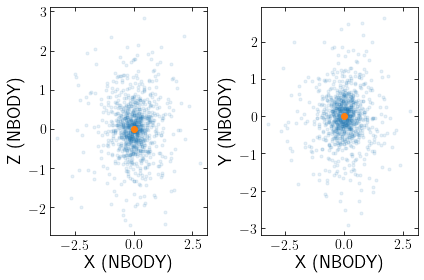

In [9]:
cluster.to_nbody()
ctools.starplot(cluster)

Similar to changing units, changing coordinate systems will not recalculate key parameters or variables set in previous function calls unless ``do_key_params=True``. The latter will likely only need to be set if moving between the ``cluster`` and ``centre`` origins. It would be rare that one wants to know the order of stars with respect to the Galactic centre when ``origin='galaxy'``. 

For example, to view your cluster in the galaxy's reference frame and calculate values in kpc:

In [10]:
cluster.to_kpckms(do_key_params=True)
cluster.to_galaxy()

Mean radius with numpy =  9.99998180299
Mean radius with clustertools =  0.00245102483757
Half mass radius = 0.00196178691294
50% Lagrange Radius =  0.00196178691294


0

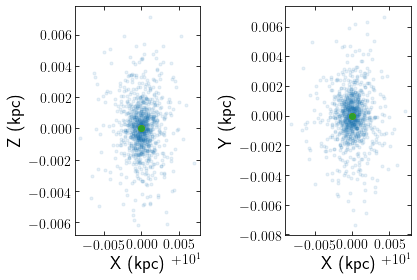

In [11]:
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)
print('Half mass radius =', cluster.rm)
print('50% Lagrange Radius = ',cluster.rn[4])

ctools.starplot(cluster)

Note that the mean radius, when calculated using numpy, is approximately 10 kpc which is the orbital distance of the cluster. However, since the ``do_key_params`` call was done before the change of coordinates and the stars have not been reordered ``cluster.rmean``, ``cluster.rm`` and ``cluster.rn`` are the same as before (just in units of kpc). If I instead set ``do_key_params=True`` when moving to the galaxy coordinate system, everything is recalculated:

In [12]:
cluster.to_galaxy(do_key_params=True)

Mean radius with numpy =  9.99998180299
Mean radius with clustertools =  9.99998180299
Half mass radius = 9.9999783598
50% Lagrange Radius =  0.00196178691294


0

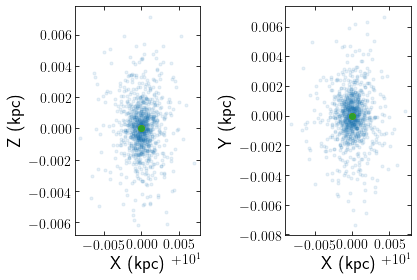

In [13]:
print('Mean radius with numpy = ',np.mean(cluster.r))
print('Mean radius with clustertools = ',cluster.rmean)
print('Half mass radius =', cluster.rm)
print('50% Lagrange Radius = ',cluster.rn[4])

ctools.starplot(cluster)

Two functions worth noting are ``save_cluster`` and ``return_cluster``. ``save_cluster`` will return the current units and origin of your cluster, so you can then i) change units/coordinate systems, ii) make calculates, and then return your cluster to its original state using ``return_cluster``.

For example, with the above cluster having ``units='kpckms'`` and ``origin='galaxy'``, one may wish to switch to the clustercentric frame of reference to calculate the half-mass radius:

In [14]:
#Save Cluster
units,origin=ctools.save_cluster(cluster)
print(units,origin)
#Move to clustercentric coordinates
cluster.to_cluster(do_key_params=True)
print('Half mass radius = ',cluster.rm)
#Move back
ctools.return_cluster(cluster,units,origin)
print(cluster.units,cluster.origin)

kpckms galaxy
Half mass radius =  0.00196178691294
kpckms galaxy


It is worth noting that if ``cluster.units='galaxy'``, almost all functions will move the cluster to a clustercentric coordinate system or to its centre of density to make calculations and then return it to its original state.

Finally, two operations that may be helpful when trying to initialize a cluster are ``virialize`` and ``add_rotation``. ``virialize`` will scale all the stellar velocities so the virial parameter is exactly 0.5.

In [15]:
#At the moment, our cluster is not perfectly in virial equilibrium:
cluster.energies()
print(cluster.qvir)
#However it can be scaled such that ``cluster.qvir=-0.5``
cluster.virialize()
cluster.energies()

print('New Qv: ',cluster.qvir)


-1.40814083302
New Qv:  -0.5


Adding rotation will, as the name implies, add a degree of rotation to the cluster. Rotation is added using the ``qrot`` parameter, which will be the fraction of stars with v_phi < 0 that are switched to having vphi > 0. It can be done via:

In [16]:
#How many stars have vtheta < 0 in the clustercentric coordinate system
cluster.to_cluster()
r, theta, z, vr, vtheta, vz=ctools.cart_to_cyl(cluster.x,cluster.y,cluster.z,cluster.vx,cluster.vy,cluster.vz)
print('Fraction of stars with vtheta<0 =', np.sum(vtheta<0)/cluster.ntot)

#Now switch the sign of vtheta for 50% of stars with vtheta<0
print('Add rotation of 50%')
cluster.add_rotation(qrot=0.5)
r, theta, z, vr, vtheta, vz=ctools.cart_to_cyl(cluster.x,cluster.y,cluster.z,cluster.vx,cluster.vy,cluster.vz)
print('Now fraction of stars with vtheta<0 =', np.sum(vtheta<0)/cluster.ntot)


Fraction of stars with vtheta<0 = 0.517
Add rotation of 50%
Now fraction of stars with vtheta<0 = 0.263
